# Sprint18 データセット作成

## 1.このSprintについて

### Sprintの目的
- データセットを作成し学習する
- データ拡張を行う

### どのように学ぶか
自作のデータセットを作り、さらにデータ拡張も行なっていきます。

## 2.自作データセットの学習
自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

### 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf


%matplotlib inline

In [2]:
train_path = 'C:\\Users\\圭司\diveintocode-ml\images\\train' 
print(train_path)
train_img_list = glob.glob(train_path + '/*' + ".jpg")
print(train_img_list)

C:\Users\圭司\diveintocode-ml\images\train
['C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_01.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_02.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_03.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_04.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_05.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_06.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_07.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_08.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_09.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_10.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_11.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\cat_12.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\dog_01.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\dog_02.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\train\\dog_03.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\tr

In [3]:
test_path = 'C:\\Users\\圭司\diveintocode-ml\images\\test' 
print(test_path)
test_img_list = glob.glob(test_path + '/*' + ".jpg")
print(test_img_list)

C:\Users\圭司\diveintocode-ml\images\test
['C:\\Users\\圭司\\diveintocode-ml\\images\\test\\cat_1.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\cat_2.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\cat_3.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\cat_6.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\dog_1.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\dog_2.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\dog_3.jpg', 'C:\\Users\\圭司\\diveintocode-ml\\images\\test\\dog_6.jpg']


In [4]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in train_img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
    



dog_image:(5, 224, 224, 3)  cat_image:(12, 224, 224, 3)
0


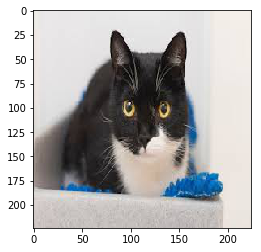

1


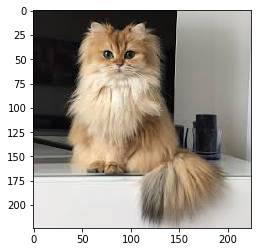

2


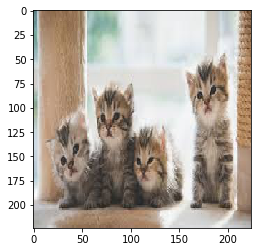

3


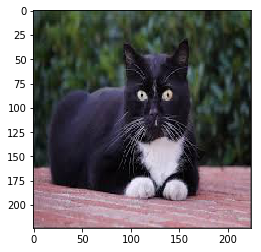

4


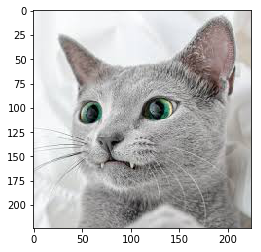

5


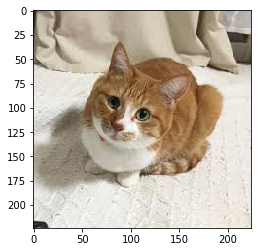

6


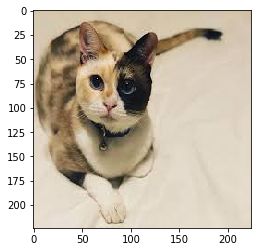

7


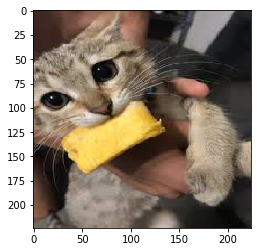

8


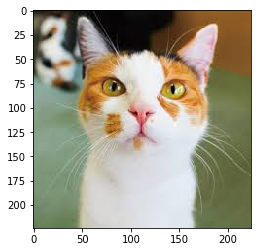

9


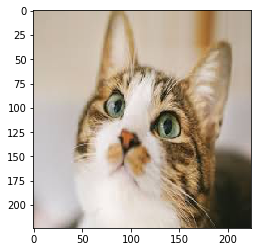

10


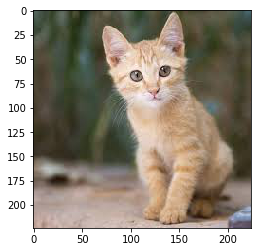

11


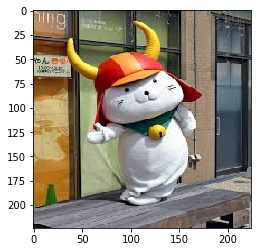

In [5]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))
for i in range(cat_img_array.shape[0]):
    print(i)
    plt.imshow(cat_img_array[i])
    plt.show()

In [6]:
y = np.r_[np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0])]
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [7]:
y = np.r_[np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0])]
print(y)
X = np.r_[cat_img_array, dog_img_array]
print(X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
(17, 224, 224, 3)


W1030 20:53:59.805728  8576 deprecation.py:506] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1030 20:53:59.900792  8576 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


y_pred_proba [0.32138312 0.266864   0.3718787  0.3255606 ]
y_pred [0 0 0 0]
y_test [0 0 0 0]
Train loss: 0.38925451040267944
Train acc: 1.0


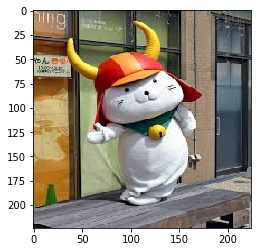

     Cat! Soooo cuuuute!!
0.68


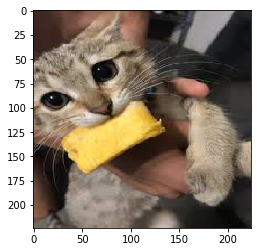

     Cat! Soooo cuuuute!!
0.73


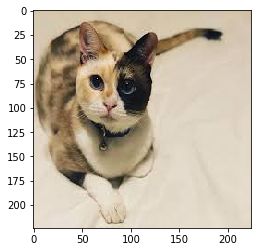

     Cat! Soooo cuuuute!!
0.63


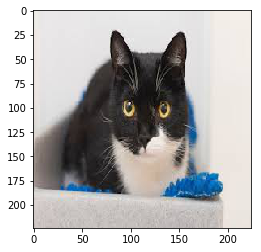

     Cat! Soooo cuuuute!!
0.67


In [8]:
y = np.r_[np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0])].astype(int)
X = np.r_[cat_img_array, dog_img_array]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

n_classes = 1

model = tf.keras.Sequential([
            tf.keras.layers.Convolution2D(filters=10, kernel_size=(3, 3), activation=tf.nn.relu),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),                               
            tf.keras.layers.Dense(n_classes, activation = tf.sigmoid)])

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=0)#,
                    #validation_data=(X_val, y_val))

y_pred_proba = model.predict(X_test)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0).reshape(-1,)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print("y_test", y_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train acc:', score[1])

for i in range(X_test.shape[0]):
    plt.imshow(X_test[i])
    plt.show()
    if y_pred[i]==0:
        print("     Cat! Soooo cuuuute!!")
        print("{:.2f}".format(1-y_pred_proba[i]))
    else:
        print("     Dog. Not so bad...")
        print("{:.2f}".format(y_pred_proba[i]))

### 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

《データ拡張のためのライブラリ》

データ拡張にはalbumentationsなどがあります。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)

また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


Epoch 1/2
1/0 [=========================================================================] - 0s 394ms/step - loss: 96.2830 - acc: 0.6923
Epoch 2/2
1/0 [=========================================================================] - 0s 292ms/step - loss: 421.9426 - acc: 0.3077
Epoch 0
13/13 [==============================] - 0s 13ms/sample - loss: 55.8012 - acc: 0.6154


W1030 20:54:18.080390  8576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(13, 224, 224, 3)
[0 0 1 0 0 0 1 1 0 1 0 0 0]
(26, 224, 224, 3)
(26,)
Epoch 1
26/26 [==============================] - 0s 12ms/sample - loss: 1128.9258 - acc: 0.6923


W1030 20:54:18.840158  8576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(26, 224, 224, 3)
[1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0]
(52, 224, 224, 3)
(52,)
y_pred_proba [0. 0. 0. 0.]
y_pred [0 0 0 0]
y_test [1 0 0 0]
Train loss: 38.93939208984375
Train acc: 0.75


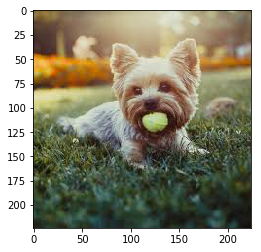

     Cat! Soooo cuuuute!!
1.00


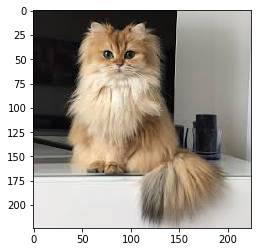

     Cat! Soooo cuuuute!!
1.00


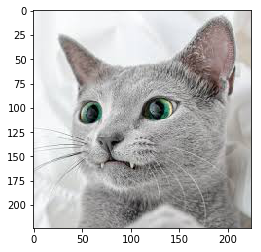

     Cat! Soooo cuuuute!!
1.00


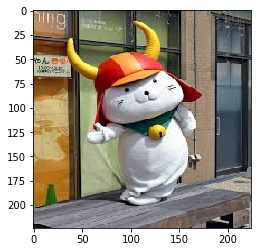

     Cat! Soooo cuuuute!!
1.00


In [12]:
y = np.r_[np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0])].astype(int)
X = np.r_[cat_img_array, dog_img_array]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

epochs = 2

datagen = tf.compat.v1.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=epochs)
# here's a more "manual" example
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        print(x_batch.shape)
        print(y_batch)
        plt.imshow(x_batch[2])
        X_train = np.r_[X_train, x_batch]
        y_train = np.r_[y_train, y_batch]
        print(X_train.shape)
        print(y_train.shape)
        if batches >= len(X) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
        

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

model = tf.keras.Sequential([
            tf.keras.layers.Convolution2D(filters=10, kernel_size=(3, 3), activation=tf.nn.relu),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),                               
            tf.keras.layers.Dense(n_classes, activation = tf.sigmoid)])

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=0)#,
                    #validation_data=(X_val, y_val))

y_pred_proba = model.predict(X_test)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0).reshape(-1,)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print("y_test", y_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train acc:', score[1])

for i in range(X_test.shape[0]):
    plt.imshow(X_test[i])
    plt.show()
    if y_pred[i]==0:
        print("     Cat! Soooo cuuuute!!")
        print("{:.2f}".format(1-y_pred_proba[i]))
    else:
        print("     Dog. Not so bad...")
        print("{:.2f}".format(y_pred_proba[i]))

### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

#### 《アノテーションのためのツール》

アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

【解答】
Labelimgを使って作成

### 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

<class 'numpy.ndarray'>


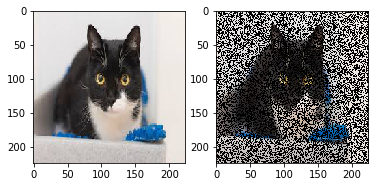

In [31]:
import imgaug as ia
from imgaug import augmenters as iaa
from matplotlib import pyplot as plt
 
img = X[0]
# 変換器を定義（0.5の確率で欠落させる）
aug = iaa.Dropout(p=0.5)
 
# 変換に使用する画像の形式はnumpy.ndarray
print(type(img))
 
# 画像に変換を適用する
aug_img = aug.augment_image(img)
 
# 描画
plt.subplot(121).imshow(img)
plt.subplot(122).imshow(aug_img)
plt.show()

W1030 21:06:57.150704  8576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1030 21:06:57.165715  8576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


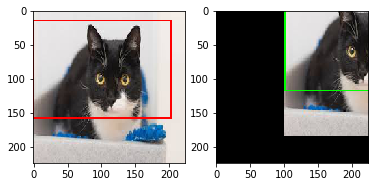

In [33]:
import imgaug as ia
from imgaug import augmenters as iaa
from matplotlib import pyplot as plt
 
image = X[0]
 
# バウンディングボックスを定義
bb = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=1, y1=15, x2=201, y2=157),
], shape=image.shape)
 
# アフィン変換を定義(右上に平行移動)
aug = iaa.Affine(translate_px={"x": 100, "y": -40})
 
# 画像とバウンディングボックスを変換
aug_img = aug.augment_image(image)
aug_bb = aug.augment_bounding_boxes([bb])[0]
 
# バウンディングボックスと画像を重ねる
image_before = bb.draw_on_image(img, thickness=2, color=[255, 0,0])
image_after = aug_bb.draw_on_image(aug_img, thickness=2, color=[0, 255, 0])
 
# 変換前後の画像を描画
fig = plt.figure()
fig.add_subplot(121).imshow(image_before)
fig.add_subplot(122).imshow(image_after)
 
plt.show()
